<a href="https://colab.research.google.com/github/sanikaadkurkar/Car-Price-Prediction/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: Sanika Balu Adkurkar                
Task3: CAR PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv("/content/archive (1).zip")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
x=df.iloc[:,0:-1]
x

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [9]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Owner, Length: 301, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [11]:
x_train

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual
36,dzire,2015,4.65,7.20,48767,Petrol,Dealer,Manual
94,corolla altis,2008,4.00,22.78,89000,Petrol,Dealer,Automatic
208,i20,2017,7.90,8.10,3435,Petrol,Dealer,Manual
266,amaze,2014,3.65,7.00,35000,Petrol,Dealer,Manual
...,...,...,...,...,...,...,...,...
145,TVS Apache RTR 160,2012,0.60,0.81,19000,Petrol,Individual,Manual
16,ertiga,2015,7.25,10.79,41678,Diesel,Dealer,Manual
58,etios g,2014,4.10,6.80,39485,Petrol,Dealer,Manual
277,city,2015,9.70,13.60,21780,Petrol,Dealer,Manual


In [12]:
x_test

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
288,city,2015,8.40,13.60,34000,Petrol,Dealer,Manual
130,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual
245,verna,2012,5.20,9.40,71000,Diesel,Dealer,Manual
160,Bajaj Avenger Street 220,2011,0.45,0.95,24000,Petrol,Individual,Manual
124,Royal Enfield Classic 500,2012,0.95,1.75,11500,Petrol,Individual,Manual
...,...,...,...,...,...,...,...,...
176,Honda Karizma,2011,0.35,1.05,30000,Petrol,Individual,Manual
65,etios liva,2014,4.75,6.95,45000,Diesel,Dealer,Manual
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual
67,fortuner,2010,9.25,20.45,59000,Diesel,Dealer,Manual


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
numerical_feat=[]
categorical_feat=[]
for i in df.columns:
  if(df[i].dtypes!=object):
    numerical_feat.append(i)
  else:
    categorical_feat.append(i)

In [17]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [18]:
numerical_feat

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [19]:
len(numerical_feat)

5

In [20]:
len(categorical_feat)

4

In [21]:
categorical_feat

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

<ipython-input-30-009c2ac6fd42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Selling_Price)


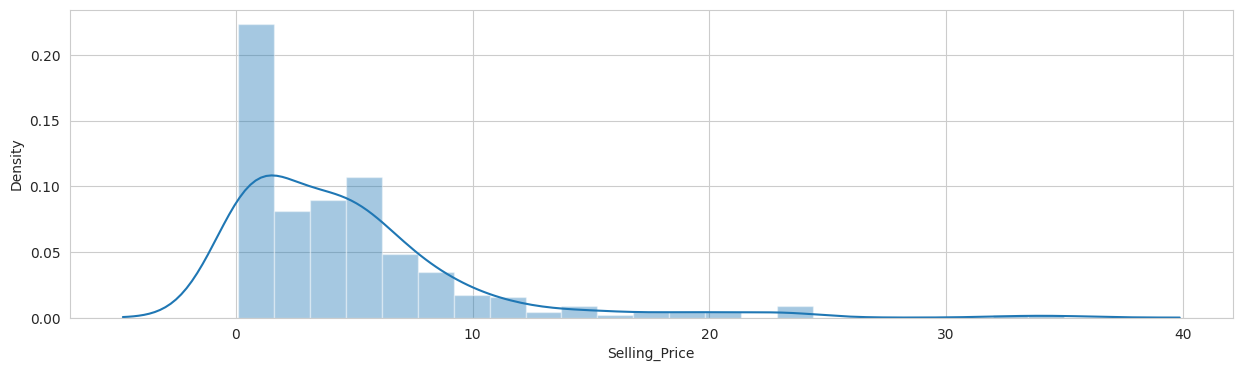

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,4))
sns.distplot(df.Selling_Price)
plt.show()

<ipython-input-32-59eab637d561>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Present_Price)


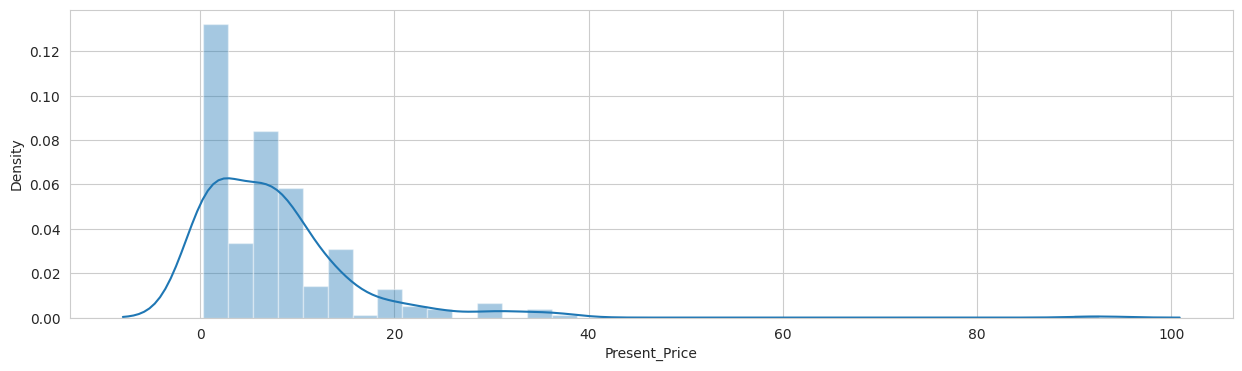

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,4))
sns.distplot(df.Present_Price)
plt.show()

CORRELATION

In [33]:
print(df.corr())

                   Year  Selling_Price  Present_Price  Driven_kms     Owner
Year           1.000000       0.236141      -0.047192   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878914    0.029187 -0.088344
Present_Price -0.047192       0.878914       1.000000    0.203618  0.008058
Driven_kms    -0.524342       0.029187       0.203618    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008058    0.089216  1.000000


<ipython-input-33-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


HEATMAP

<ipython-input-34-0b7b9bbd28c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()


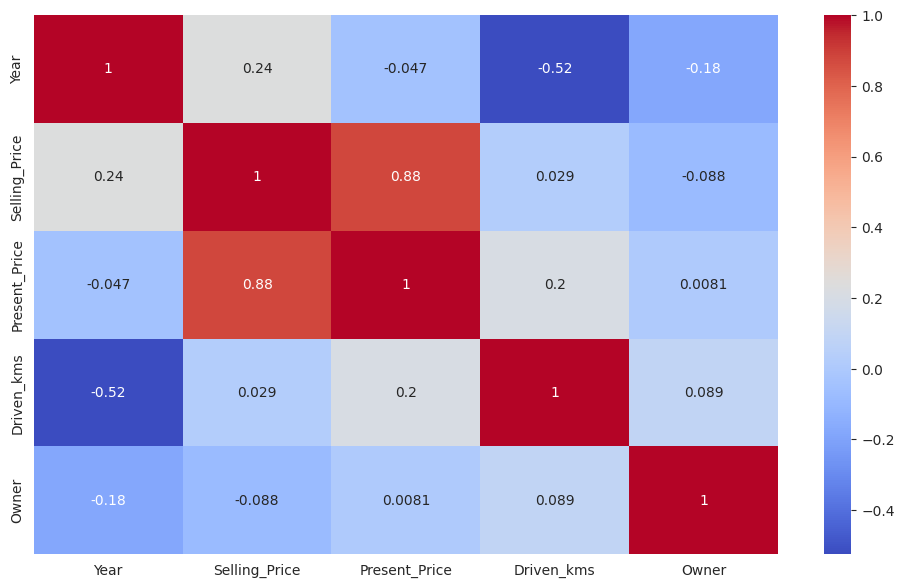

In [34]:
plt.figure(figsize=(12,7))
correlations=df.corr()
sns.heatmap(correlations,cmap="coolwarm",annot=True)
plt.show()

In [35]:
df[categorical_feat].head()

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


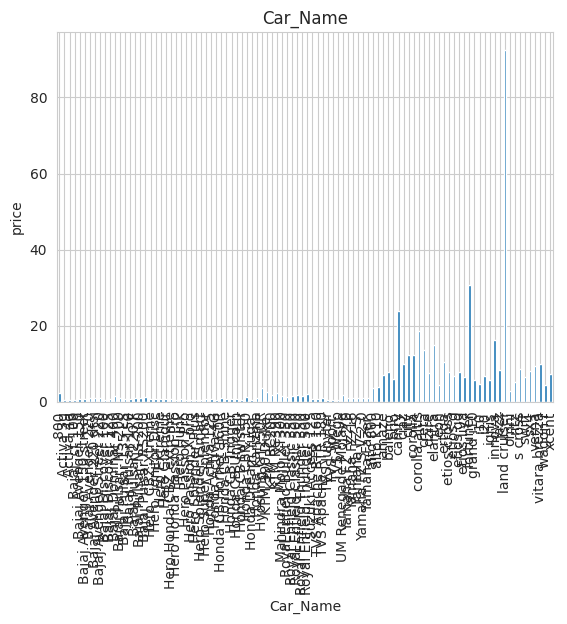

<Figure size 3000x1000 with 0 Axes>

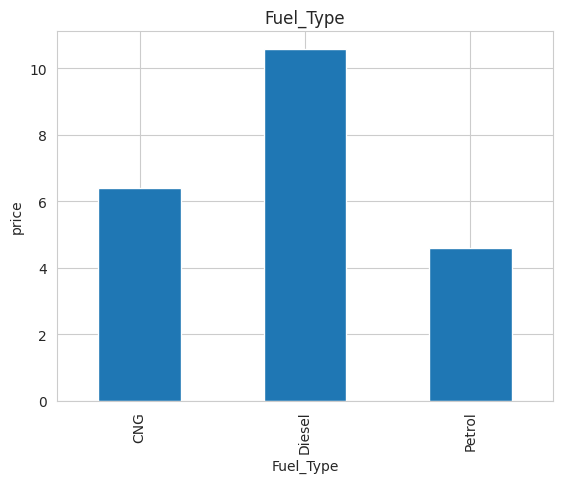

<Figure size 3000x1000 with 0 Axes>

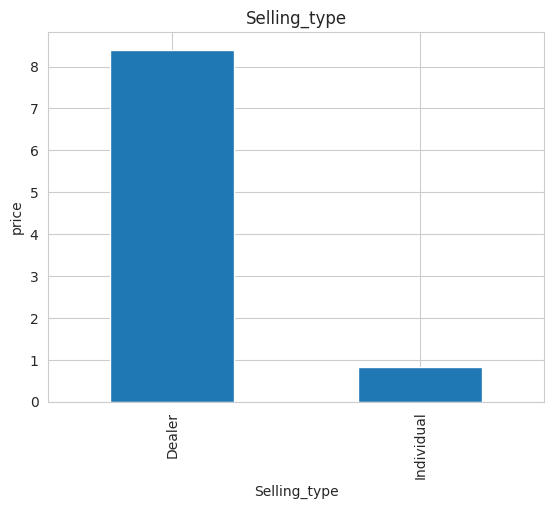

<Figure size 3000x1000 with 0 Axes>

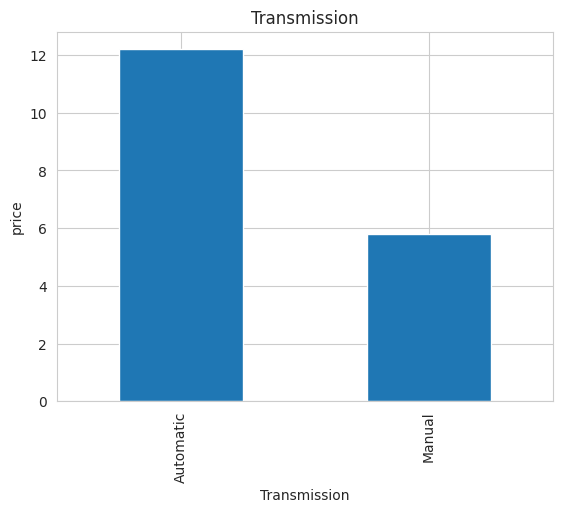

<Figure size 3000x1000 with 0 Axes>

In [38]:
for feature in categorical_feat:
  data=df
  df.groupby(feature)['Present_Price'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('price')
  plt.title(feature)
  plt.figure(figsize=(30,10))
  plt.show()

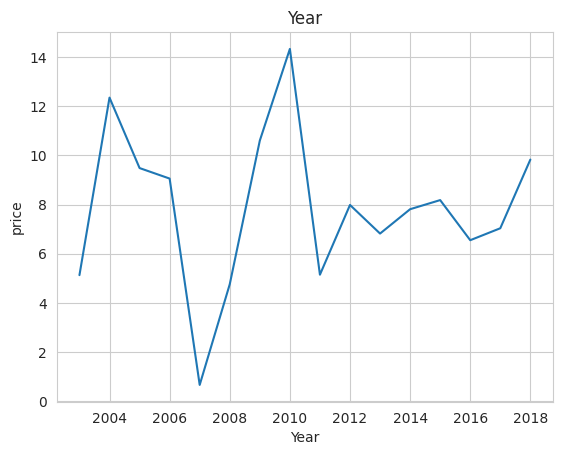

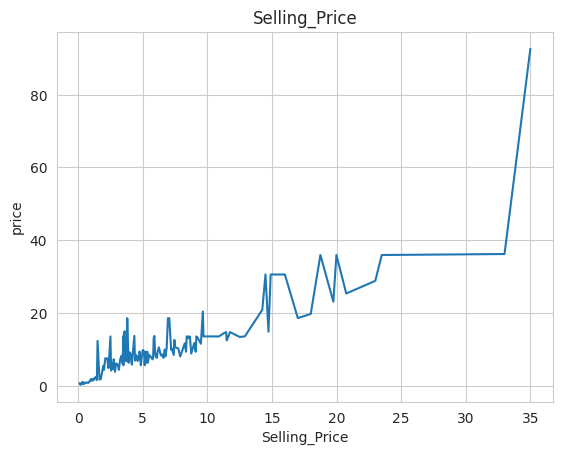

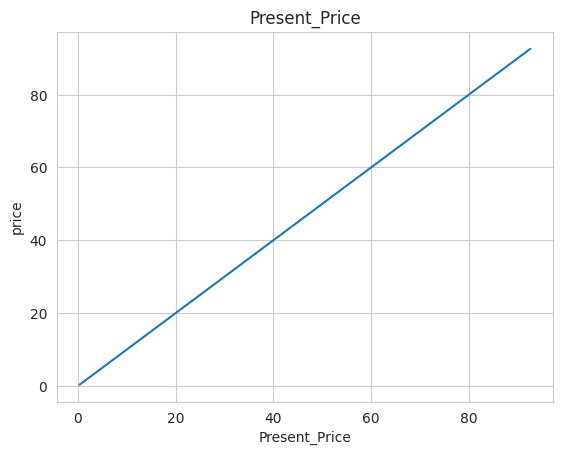

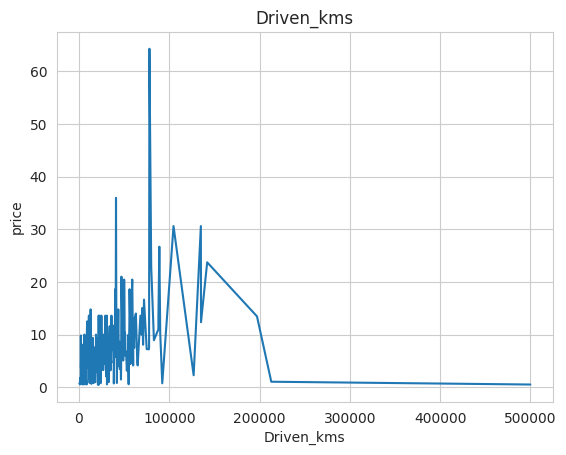

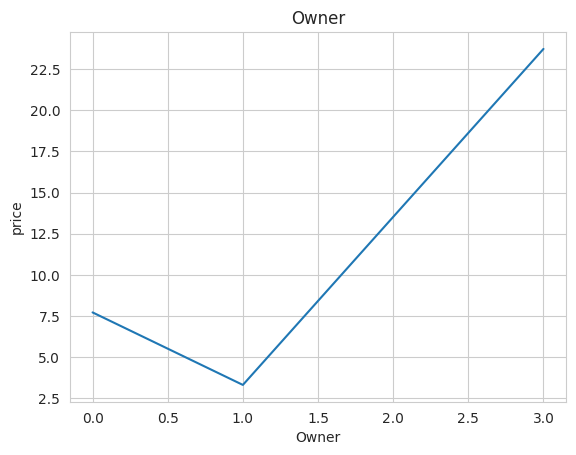

In [41]:
for feature in numerical_feat:
  df.groupby(feature)['Present_Price'].mean().plot()
  plt.xlabel(feature)
  plt.ylabel('price')
  plt.title(feature)
  plt.show()

In [47]:
discrete_feature=[feature for feature in numerical_feat if len(df[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count".format(len(discrete_feature)))

Discrete Variables Count


In [45]:
discrete_feature

['Year', 'Owner']

In [49]:
df[discrete_feature].head()

,Year,Owner
0,2014,0
1,2013,0
2,2017,0
3,2011,0
4,2014,0


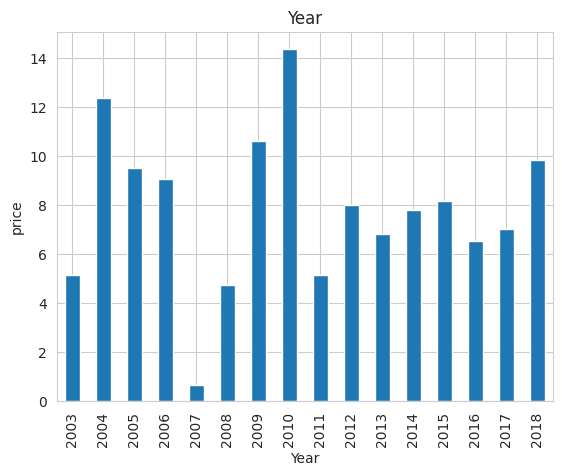

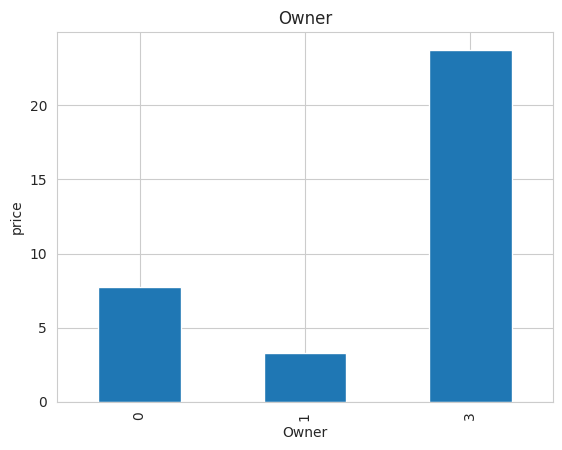

In [50]:
for feature in discrete_feature:
  df.groupby(feature)['Present_Price'].mean().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('price')
  plt.title(feature)
  plt.show()